[Reference: theoretical ecology / A simple Metropolis-Hastings MCMC in R](https://theoreticalecology.wordpress.com/2010/09/17/metropolis-hastings-mcmc-in-r/)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 7, 5

In [3]:
import numpy as np
import scipy as sp
import numpy.random as npr
import seaborn as sns
import matplotlib.pyplot as plt

# Create Data Set

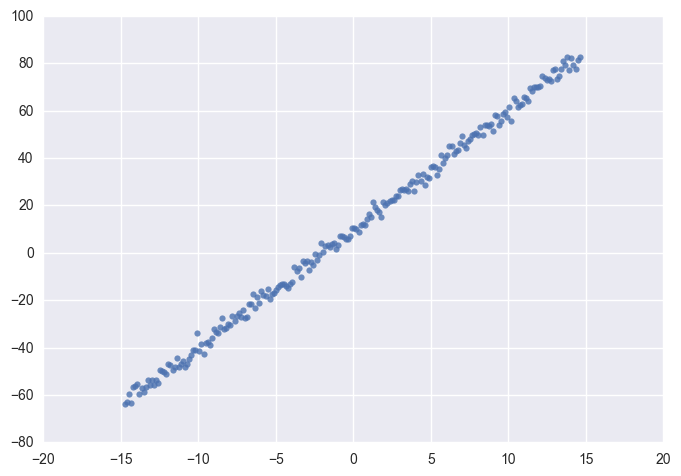

In [4]:
trueA = 5
trueB =10
trueSD = 2
sample_size = 221
x = np.arange(-sample_size/15, sample_size/15, (sample_size*2/15)/sample_size)
y = trueA *x + trueB + npr.normal(loc=0, scale=trueSD, size=sample_size)

sns.regplot(x=x, y=y, fit_reg=False)

# Define Statistical Model

In [5]:
prior_mu = 0 ; prior_sd = 10000

In [6]:
def likelihood(param):
    a = 5
    b = param[0][0]
    sd = 10
    
    pred = a*x + b # 要するにこれが「モデル」
    
    sumSqError = np.power((y - pred), 2).sum()
    
    likelihoodsum = ((sample_size/2)*(np.log(1)-np.log(np.power(sd,2)))) + (- 1/(2*np.power(sd,2)) * sumSqError) -\
    (1/2 * np.log(prior_sd)) - ( (1/(2*np.power(prior_sd,2))) * np.power((prior_mu), 2).sum()  ) # this line is prior
    
    return likelihoodsum

# Define Next

次に移動した点での $P^*(X)$　に相当するものを考える。<br>
京大の資料に従って、一つずつパラメータを動かす

In [7]:
def next_param(param):
    b_next = param[0][0] + npr.normal(0, 0.1)    
    return np.array([[b_next]])

# MCMC

In [8]:
num_sampling = 50000
chain = np.zeros((num_sampling, 1, 1))
chain[0][0][0] = 15 # starting value for a

num_accepted = 0
for i in range(num_sampling-1):
    chain_previous = chain[i][:]
    
    proposal = next_param(chain[i])

    probab = likelihood(proposal) - likelihood(chain_previous)
    u = np.log(npr.uniform(0, 1))
    if u  < probab:
        chain[i+1] = proposal
        num_accepted += 1
    else:
        chain[i+1] = chain[i]

In [9]:
num_accepted

47573

BDA通りに書くと、
```
check = min(np.exp(probab), 1) #BDA p.278
npr.uniform(0,1) < check
```
となるけれど、`np.exp(probab)`が1より大きければ結局1との大小を比べることになって常にacceptされるはずだから上のコードになるのでは

# Show Results

## b

In [10]:
show_num = int(num_sampling * 0.99)

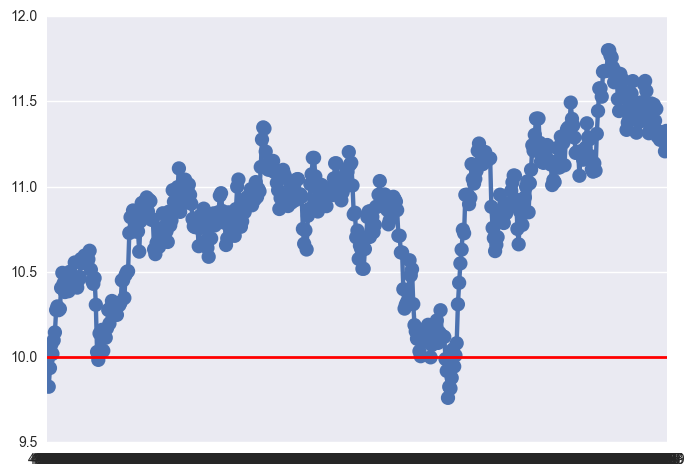

In [11]:
sns.pointplot(x=np.arange(show_num, num_sampling, 1), y=chain[show_num: , 0, 0])
plt.plot([0, num_sampling-show_num], [10, 10], linewidth=2, color='red')

In [12]:
chain[show_num: , 0, 0].mean()

10.855018557061854

In [13]:
show_num = int(num_sampling * 0.50)

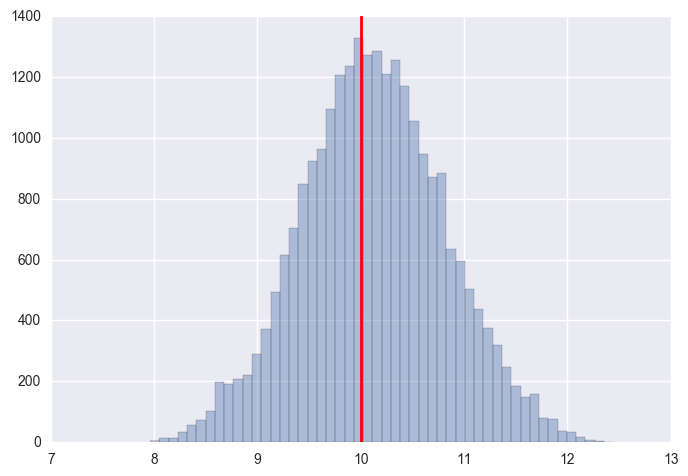

In [14]:
sns.distplot(chain[show_num: , 0, 0], hist=True, kde=False)
plt.plot([10, 10], [0, 1400], linewidth=2, color='red')